In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd="/home/aman/anaconda3/envs/tallyInvoiceParser.env/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = "/home/aman/anaconda3/envs/tallyInvoiceParser.env/share/tessdata"
os.environ['MLIR_CRASH_REPRODUCER_DIRECTORY']='tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269'
import import_ipynb
from textPreProcessor import *
from imagePreProcessor import *
from datetime import datetime
import math
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, ReLU, activation, Dropout
import tensorflow as tf

2023-06-15 09:55:59.140622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from textPreProcessor.ipynb
Original Date ----> After Processing 

5-12-22
True
2-2-2023
True
5-12-2023
True
5-05-2023
True
5-05-2023
True
10-24-2022
True
10-24-2022
True
22-05-2023
True
21-02-23
True
5-12-22
True
31-08-2022
True
importing Jupyter notebook from imagePreProcessor.ipynb


In [108]:
def processData(df):
    df.dropna(inplace=True)
    df.drop(columns=["level", "page_num", "par_num", "word_num"], inplace=True)
    
    
    df["nextDist"] = 0
    for index in range(df.shape[0]-1):
        index2 = index+1
        endpoint = df["left"][index] + df["width"][index]
        startpoint = df["left"][index2]
        nd = startpoint - endpoint
        df["nextDist"][index]=nd
    
    indexes = []
    for index in df.index:
        if df["text"][index]==" ":
            indexes.append(index)
    df.drop(indexes, inplace=True)
    df.reset_index(inplace=True)
    df.drop(columns=["index"], inplace=True)
    
    start = 0
    end = 0
    index = 0
    concatList = []
    while index<df.shape[0]:
        while df["nextDist"][index]>0 and df["nextDist"][index]<15:
            index+=1
            end+=1
        concatList.append([start, end])
        index+=1
        start = index
        end = index
    print(concatList)   
    
    for L in concatList:
        start = L[0]
        end = L[1]
        block = df["block_num"][start]
        left = df["left"][start]
        top = df["top"][start]
        width = 0
        height = []
        conf = []
        text = ""
        nd = df["nextDist"][end]
        while start<=end:
            width += df["width"][start]
            height.append(df["height"][start])
            conf.append(df["conf"][start])
            text += df["text"][start]
            start+=1
        conf = sum(conf)/len(conf)
        df.loc[len(df.index)] = [block, 0, left, top, width, max(height), conf, text, nd]
        
    
    
   
    

In [109]:
os.chdir('/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Tesseract-Modelv4/Dataset/SampleImages/')

In [110]:
image = preProcessImage("6.jpeg")

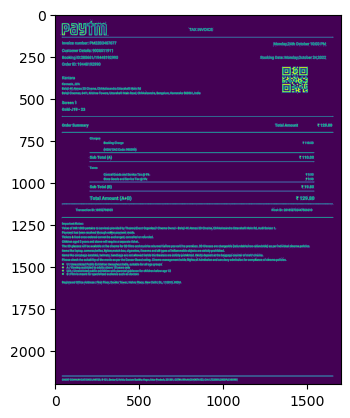

In [111]:
plt.imshow(image)

In [112]:
data = pytesseract.image_to_data(image, output_type=Output.DATAFRAME)

In [113]:
data.dropna(inplace=True)

In [114]:
data.reset_index(inplace=True)

In [115]:
data.drop(columns=["index"], inplace=True)
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,32,35,285,93,43.760906,payin
1,5,1,1,1,1,2,792,81,152,20,0.000000,rmnwoce
2,5,1,2,1,1,1,45,133,1605,10,95.000000,
3,5,1,3,1,1,1,43,163,68,18,96.488281,Invoice
4,5,1,3,1,1,2,119,163,80,18,93.032722,number:
...,...,...,...,...,...,...,...,...,...,...,...,...
337,5,1,16,1,1,12,658,2168,50,14,90.287514,"207301,"
338,5,1,16,1,1,13,711,2168,43,12,92.993866,GSTIN:
339,5,1,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,"
340,5,1,16,1,1,15,889,2168,26,12,92.983109,CIN:


In [116]:
data["par_num"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [117]:
print(data["text"].to_numpy())

['payin' 'rmnwoce' ' ' 'Invoice' 'number:' 'PM22B3467677' 'Monday,24th'
 'October' '10:00' 'PM:' 'Customer' 'Details:' '9008511911' 'Booking'
 '1D:280661/19448192990' 'Booking' 'Date:' 'Monday,October' '24,2022'
 'Order' 'ID:' '19448192990' 'Kantara' 'Kannada' ',U/A' 'Balajt' '4K'
 'Atmos' '3D' 'Cinema,' 'Chikkalasandea' 'Uttarahallt' 'Main' 'Rd'
 'Balaji' 'Cinemas,' '64/1,' 'Krishna' 'Towers,' 'Uttarahalll' 'Main'
 'Road,' 'Chikkalsandra,' 'Bengaluru,' 'Kamataka' '$60061,' 'India' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' 'Screen' '1' 'Gold-J19' '-' '23' 'Order'
 'Summary' 'Total' 'Amount' '129.80' 'Charges' 'Booking' 'Charge'
 '%110.00' '(HSN/' 'SAC' 'Code:' '998599)' '-Sub' 'Total' '(A)' '%'
 '110.00' '“Taxes' 'Central' 'Goods' 'and' 'Sérvice' 'Tax' '@' '9%.'
 '29.90' 'State' 'Goods' 'and' 'Service' 'Tax' '@9%' '29.90' 'Sub' 'Total'
 '(B)' '2.19.80' 'Total' 'Amount' '(A+B)' '=' '129.80' '‘Transaction'
 'ID:' '18952798939' 'Klosk' 'ID:' '281852732447566610' 'Important'
 'Notes:' 'Value' 'of' 'INR

In [118]:
processData(data)

[[0, 0], [1, 1], [2, 4], [5, 8], [9, 11], [12, 13], [14, 17], [18, 20], [21, 21], [22, 23], [24, 25], [26, 32], [33, 45], [46, 47], [48, 50], [51, 52], [53, 54], [55, 55], [56, 56], [57, 58], [59, 59], [60, 63], [64, 66], [67, 68], [69, 69], [70, 76], [77, 77], [78, 83], [84, 84], [85, 87], [88, 88], [89, 91], [92, 93], [94, 96], [97, 99], [100, 101], [102, 114], [115, 127], [128, 135], [136, 136], [137, 147], [148, 158], [159, 161], [162, 187], [188, 188], [189, 190], [191, 207], [208, 223], [224, 231], [232, 243], [244, 259], [260, 260], [261, 270], [271, 271], [272, 280], [281, 281], [282, 293], [294, 302], [303, 317], [318, 333]]


/tmp/ipykernel_5328/3605979698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextDist"][index]=nd


In [119]:
data

,block_num,line_num,left,top,width,height,conf,text,nextDist
0,1,1,32,35,285,93,43.760906,payin,475
1,1,1,792,81,152,20,0.000000,rmnwoce,-899
2,3,1,43,163,68,18,96.488281,Invoice,8
3,3,1,119,163,80,18,93.032722,number:,8
4,3,1,207,164,158,17,91.810379,PM22B3467677,931
...,...,...,...,...,...,...,...,...,...
389,14,0,42,1521,13,16,62.131237,@,15
390,14,0,70,1520,572,17,90.870182,U/A:Unrestrictedpublicexhibitionwithparentalgu...,-647
391,14,0,42,1535,413,17,89.804691,@$:Filmismeantforspecializedaudiencesuchasdoctors,-456
392,15,0,42,1588,627,33,86.168338,"RegisteredOfficeAddress:FirstFloor,DevikaTower...",-708


In [120]:
print(data["text"].to_numpy())

['payin' 'rmnwoce' 'Invoice' 'number:' 'PM22B3467677' 'Monday,24th'
 'October' '10:00' 'PM:' 'Customer' 'Details:' '9008511911' 'Booking'
 '1D:280661/19448192990' 'Booking' 'Date:' 'Monday,October' '24,2022'
 'Order' 'ID:' '19448192990' 'Kantara' 'Kannada' ',U/A' 'Balajt' '4K'
 'Atmos' '3D' 'Cinema,' 'Chikkalasandea' 'Uttarahallt' 'Main' 'Rd'
 'Balaji' 'Cinemas,' '64/1,' 'Krishna' 'Towers,' 'Uttarahalll' 'Main'
 'Road,' 'Chikkalsandra,' 'Bengaluru,' 'Kamataka' '$60061,' 'India'
 'Screen' '1' 'Gold-J19' '-' '23' 'Order' 'Summary' 'Total' 'Amount'
 '129.80' 'Charges' 'Booking' 'Charge' '%110.00' '(HSN/' 'SAC' 'Code:'
 '998599)' '-Sub' 'Total' '(A)' '%' '110.00' '“Taxes' 'Central' 'Goods'
 'and' 'Sérvice' 'Tax' '@' '9%.' '29.90' 'State' 'Goods' 'and' 'Service'
 'Tax' '@9%' '29.90' 'Sub' 'Total' '(B)' '2.19.80' 'Total' 'Amount'
 '(A+B)' '=' '129.80' '‘Transaction' 'ID:' '18952798939' 'Klosk' 'ID:'
 '281852732447566610' 'Important' 'Notes:' 'Value' 'of' 'INR' '1000'
 'pertains' 'to' 'servic

In [107]:
data.to_csv("sample.csv")